# Вторая лабораторная работа

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 1279.5, 959.5, -0.5)

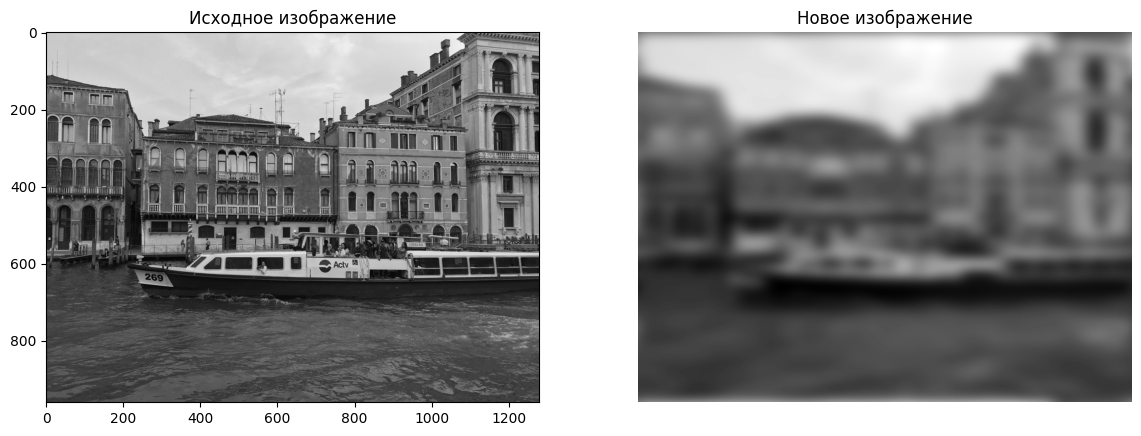

In [25]:
# img=cv2.imread('photos_cv/галера_Венеция.jpg',cv2.IMREAD_GRAYSCALE)
# h,w=img.shape
# F=np.fft.fft2(img) #находим прямое ДПФ изображения img
# D0 = 10 # Параметры фильтра
# u,v = np.mgrid[0:h:960j,0:w:1280j] #задаем сетку в частотной области
# center = (h/2,w/2) 
# G = np.exp(-((u-h/2)**2+(v-w/2)**2)/(2*D0*D0)) #создаем центрированный фильтр
# G_shift = np.fft.ifftshift(G) #децентрируем фильтр
# J=F*G_shift #перемножаем ДПФ и децентрированный фильтр
# F_new=np.fft.ifft2(J) #находим обратное ДПФ
# img_new=np.real(F_new) #находим изображение, преобразованное фильтром
# cv2.imwrite('photos_cv/галера_серая_старая.png',img_new)

# plt.figure(figsize = (14, 7))
# plt.subplot(1, 2, 1)
# plt.title('Исходное изображение')
# plt.imshow(img, cmap = 'gray')
# plt.axis('on')

# plt.subplot(1, 2, 2)
# plt.title('Новое изображение')
# plt.imshow(img_new, cmap = 'gray')
# plt.axis('off')

In [3]:
img = cv2.imread('photos_cv/галера_Венеция.jpg', cv2.IMREAD_GRAYSCALE)
h, w = img.shape

# Прямое ДПФ изображения
#print(img.shape, '\n', img)
F = np.fft.fft2(img)
#print(F.shape, '\n', F)
F_shift = np.fft.fftshift(F)
#print(F_shift.shape, '\n', F_shift)

# Параметры фильтра
D0 = 10
u, v = np.meshgrid(np.arange(w), np.arange(h))

# Создание фильтра
D = np.sqrt((u - w/2)**2 + (v - h/2)**2)
G = np.exp(-(D**2) / (2 * (D0**2)))

# Применение фильтра
J = F_shift * G

# Обратное ДПФ
F_new = np.fft.ifftshift(J)
img_new = np.fft.ifft2(F_new)
img_new = np.abs(img_new)

# Нормализация и сохранение изображения
img_new = (img_new - img_new.min()) / (img_new.max() - img_new.min()) * 255
img_new = img_new.astype(np.uint8)
cv2.imwrite('photos_cv/галера_серая.png', img_new)

True

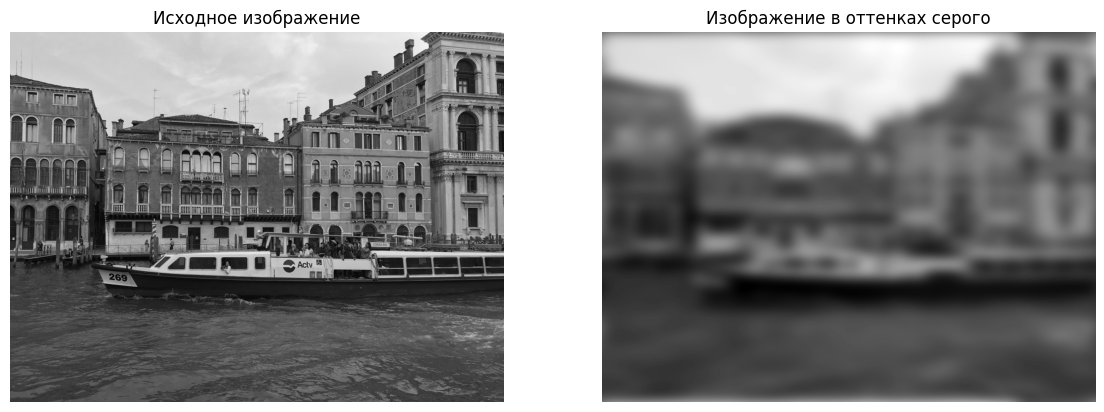

In [4]:
plt.figure(figsize = (14, 7))
plt.subplot(1, 2, 1)
plt.title("Исходное изображение")
plt.imshow(img, cmap = 'gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Изображение в оттенках серого")
plt.imshow(img_new, cmap = 'gray')
plt.axis("off")

plt.show()

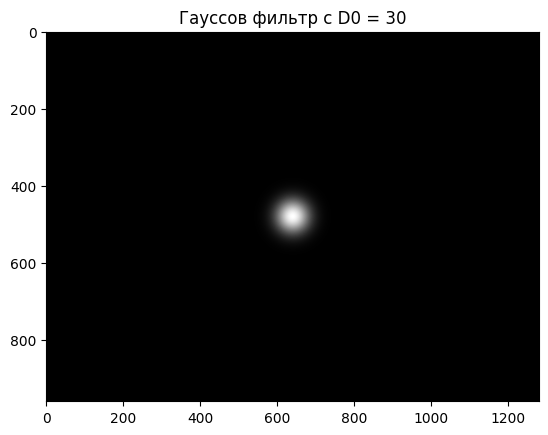

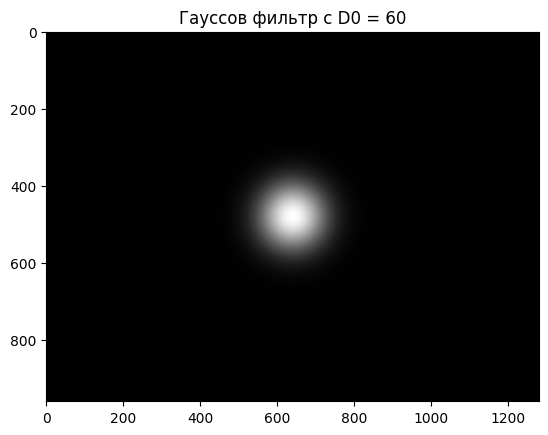

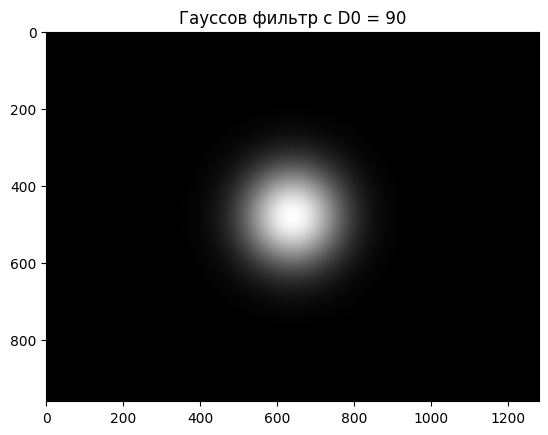

In [35]:

def show_filter(D0):
    G = np.exp(-(D**2) / (2 * (D0**2)))
    plt.imshow(G, cmap='gray')
    plt.title(f'Гауссов фильтр с D0 = {D0}')
    plt.show()

show_filter(30)
show_filter(60)
show_filter(90)

### Третья лабораторная работа (тренировка)

In [19]:
import cv2
import numpy as np

def Gauss_pyr(img, lev):
    temp = img.copy()
    output = [img]
    for i in range(lev):
        dst = cv2.pyrDown(temp) # думаю можно сразу не в переменную dst, а в переменную temp помещать значение
        output.append(dst)
        cv2.imwrite(f'photos_cv/img_{i+1}.jpg', dst)
        temp = dst.copy()
    return output

def Gauss_pyr_up(img, lev):
    temp = img.copy()
    output = []
    for i in range(lev, 0, -1):
        dst = cv2.pyrUp(temp) # думаю можно сразу не в переменную dst, а в переменную temp помещать значение
        output.append(dst)
        cv2.imwrite(f'photos_cv/img_up_{i}.jpg', dst)
        temp = dst.copy()
    return output

def main(level = 10):
    image = cv2.imread('/Users/alexrust/Documents/мага_2_курс/CV/photos_cv/самолёт.jpg')
    if image is None:
        print("Ошибка загрузки изображения.")
        return
    Gauss_im = Gauss_pyr(image, level)
    Gauss_im_up = Gauss_pyr_up(Gauss_im[level], level)

if __name__ == '__main__':
    main(3)

In [20]:
import cv2
import numpy as np

def Gauss_pyr(img, lev):
    temp = img.copy()
    output = [img]
    for i in range(1, lev):
        dst = cv2.pyrDown(temp) # думаю можно сразу не в переменную dst, а в переменную temp помещать значение
        output.append(dst)
        cv2.imwrite(f'photos_cv/img_{i+1}.jpg', dst)
        temp = dst.copy()
    return output

def Gauss_pyr_up(img, lev):
    temp = img.copy()
    output = []
    for i in range(lev, 0, -1):
        dst = cv2.pyrUp(temp) # думаю можно сразу не в переменную dst, а в переменную temp помещать значение
        output.append(dst)
        cv2.imwrite(f'photos_cv/img_up_{i}.jpg', dst)
        temp = dst.copy()
    return output

def main():
    image = cv2.imread('/Users/alexrust/Documents/мага_2_курс/CV/photos_cv/самолёт.jpg')
    if image is None:
        print("Ошибка загрузки изображения.")
        return
    level = 3

    # Получаем пирамиду изображений
    Gauss_im = Gauss_pyr(image, level)
    Gauss_im_up = Gauss_pyr_up(Gauss_im[level], level)
    
    # Отображаем оригинальное изображение
    cv2.imshow('Уровень 0 - Оригинальное изображение', image)
    cv2.waitKey(0)
    cv2.destroyWindow('Уровень 0 - Оригинальное изображение')
    cv2.waitKey(1)  # Обрабатываем события GUI

    # Отображаем изображения пирамиды по очереди
    for i in range(1, len(Gauss_im)):
        window_name = f'Уровень {i}'
        cv2.imshow(window_name, Gauss_im[i])
        cv2.waitKey(0)
        cv2.destroyWindow(window_name)
        cv2.waitKey(1)  # Обрабатываем события GUI

        # Отображаем изображения пирамиды по очереди
    for i in range(1, len(Gauss_im_up)):
        window_name = f'Уровень {i}'
        cv2.imshow(window_name, Gauss_im_up[i])
        cv2.waitKey(0)
        cv2.destroyWindow(window_name)
        cv2.waitKey(1)  # Обрабатываем события GUI

    # Убедимся, что все окна закрыты
    cv2.destroyAllWindows()
    cv2.waitKey(1)

if __name__ == '__main__':
    main()

# DZ3_Kononenko (practic)

In [2]:
import cv2
import numpy as np

In [3]:
def Gauss_pyr(img, lev):
    temp = img.copy() # думаю можно сразу не в переменную dst, а в переменную temp помещать значение
    output = [img]
    for i in range(lev):
        dst = cv2.pyrDown(temp)
        output.append(dst)
        cv2.imwrite(f'photos_cv/img_{i+1}.jpg', dst)
        temp = dst.copy()
    return output

def Laplace_pyr(Gauss_images):
    lev = len(Gauss_images)
    output = [Gauss_images[lev - 1]]
    for i in range(lev - 2, -1, -1):
        Up_image = cv2.pyrUp(Gauss_images[i+1])
        dst = cv2.subtract(Gauss_images[i], Up_image)
        output.append(dst)
    return output

def main():
    I = cv2.imread('photos_cv/самолёт.jpg')
    J = cv2.imread('photos_cv/небо.jpg')

    height, width, channels = I.shape
    real = np.vstack((I[:int(height/2), :], J[int(height/2):, :]))
    cv2.imwrite('real_francenstain.jpg', real)
    level = 5

    Gauss_I = Gauss_pyr(I, level)
    Gauss_J = Gauss_pyr(J, level)
    Laplace_I = Laplace_pyr(Gauss_I)
    Laplace_J = Laplace_pyr(Gauss_J)
    
    Laplace_joint = []
    for li, lj in zip(Laplace_I, Laplace_J):
        rows = li.shape[0]
        ls = np.vstack((li[:int(rows/2), :], lj[int(rows/2):, :]))
        Laplace_joint.append(ls)
    
    Photo = Laplace_joint[0]
    for i in range(1, level + 1):
        Photo = cv2.pyrUp(Photo)
        Photo = cv2.add(Photo, Laplace_joint[i])
        cv2.imwrite(f'photos_cv/blending_{level - i}.jpg', Photo)

if __name__ == '__main__':
    main()
        

In [ ]:
import cv2
import numpy as np

def Gauss_pyr(img, lev):
    temp = img.copy()
    output = [temp]
    for i in range(lev):
        dst = cv2.pyrDown(temp)
        output.append(dst)
        temp = dst.copy()
    return output

def Laplace_pyr(Gauss_images):
    lev = len(Gauss_images)
    output = []
    for i in range(lev - 1):
        GA = Gauss_images[i]
        GB = cv2.pyrUp(Gauss_images[i + 1])
        GB = cv2.resize(GB, (GA.shape[1], GA.shape[0]))
        L = cv2.subtract(GA, GB)
        output.append(L)
    output.append(Gauss_images[-1])
    return output

def blend_pyramids(LpA, LpB, Mp):
    LS = []
    for la, lb, m in zip(LpA, LpB, Mp):
        ls = la * m + lb * (1 - m)
        LS.append(ls)
    return LS

def main():
    # Загрузка изображений
    I = cv2.imread('photos_cv/самолёт.jpg')
    J = cv2.imread('photos_cv/небо.jpg')

    
    # Изменение размеров изображений для совпадения
    print(I.shape, J.shape)
    height, width = min(I.shape[0], J.shape[0]), min(I.shape[1], J.shape[1])
    I = cv2.resize(I, (width, height))
    J = cv2.resize(J, (width, height))
    
    # Создание маски для самолета
    # Маска должна быть изображением того же размера, где самолет белый, а фон черный
    # Попробуем создать маску автоматически
    gray_I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
    # Настроим пороговое значение для выделения самолета; возможно, потребуется подстроить
    _, mask = cv2.threshold(gray_I, 127, 255, cv2.THRESH_BINARY_INV)
    mask = cv2.GaussianBlur(mask, (9, 9), 0)
    mask = cv2.normalize(mask.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
    # Преобразуем маску в 3-канальное изображение
    mask = cv2.merge([mask, mask, mask])
    
    level = 5  # Уровень пирамиды
    
    # Генерация гауссовых пирамид
    Gauss_I = Gauss_pyr(I, level)
    Gauss_J = Gauss_pyr(J, level)
    Gauss_mask = Gauss_pyr(mask, level)
    
    # Генерация лапласиановых пирамид
    Laplace_I = Laplace_pyr(Gauss_I)
    Laplace_J = Laplace_pyr(Gauss_J)
    
    # Смешивание пирамид с использованием маски
    Laplace_joint = blend_pyramids(Laplace_I, Laplace_J, Gauss_mask)
    
    # Реконструкция итогового изображения
    Photo = Laplace_joint[-1]
    for i in range(level - 1, -1, -1):
        Photo = cv2.pyrUp(Photo)
        Photo = cv2.resize(Photo, (Laplace_joint[i].shape[1], Laplace_joint[i].shape[0]))
        Photo = cv2.add(Photo, Laplace_joint[i])
    
    # Сохранение и вывод итогового изображения
    cv2.imwrite('photos_cv/blended_result.jpg', Photo)
    cv2.imshow('Итоговое изображение', Photo.astype(np.uint8))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == '__main__':
    main()

(640, 1280, 3) (640, 1280, 3)


Размеры самолета: (640, 1280, 3), Размеры неба: (640, 1280, 3)


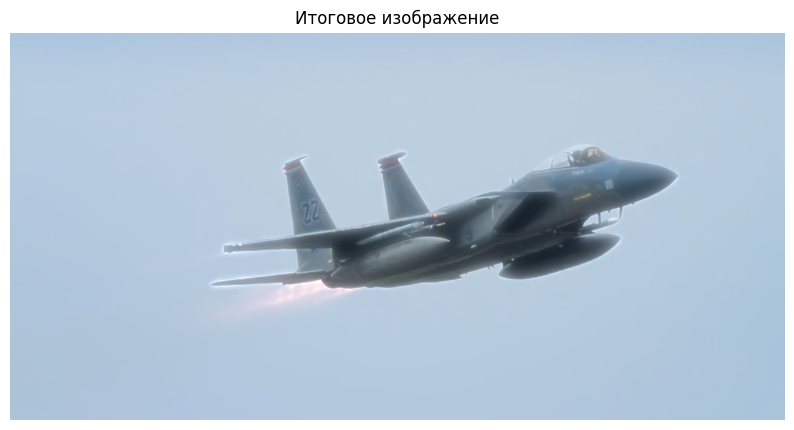

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def Gauss_pyr(img, lev):
    temp = img.copy()
    output = [temp]
    for i in range(lev):
        dst = cv2.pyrDown(temp)
        output.append(dst)
        temp = dst.copy()
    return output

def Laplace_pyr(Gauss_images):
    lev = len(Gauss_images)
    output = []
    for i in range(lev - 1):
        GA = Gauss_images[i]
        GB = cv2.pyrUp(Gauss_images[i + 1])
        GB = cv2.resize(GB, (GA.shape[1], GA.shape[0]))
        L = cv2.subtract(GA, GB)
        output.append(L)
    output.append(Gauss_images[-1])
    return output

def blend_pyramids(LpA, LpB, Mp):
    LS = []
    for la, lb, m in zip(LpA, LpB, Mp):
        ls = la * m + lb * (1 - m)
        LS.append(ls)
    return LS

def display_image(img, title="Изображение"):
    # Преобразуем изображение из BGR в RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

def main():
    # Загрузка изображений
    I = cv2.imread('photos_cv/самолёт.jpg')
    J = cv2.imread('photos_cv/небо.jpg')

    if I is None or J is None:
        print("Ошибка: Не удалось загрузить изображения. Проверьте пути к файлам.")
        return

    # Изменение размеров изображений для совпадения
    print(f"Размеры самолета: {I.shape}, Размеры неба: {J.shape}")
    height, width = min(I.shape[0], J.shape[0]), min(I.shape[1], J.shape[1])
    I = cv2.resize(I, (width, height))
    J = cv2.resize(J, (width, height))

    # Создание маски для самолета
    gray_I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
    # Используем адаптивное пороговое значение для лучшего выделения
    _, mask = cv2.threshold(gray_I, 250, 255, cv2.THRESH_BINARY_INV)  # Порог увеличен для лучшего выделения
    mask = cv2.GaussianBlur(mask, (19, 19), 0)  # Увеличен размер ядра для сглаживания
    mask = cv2.normalize(mask.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
    # Преобразуем маску в 3-канальное изображение
    mask = cv2.merge([mask, mask, mask])

    level = 4 # Уровень пирамиды

    # Генерация гауссовых пирамид
    Gauss_I = Gauss_pyr(I, level)
    Gauss_J = Gauss_pyr(J, level)
    Gauss_mask = Gauss_pyr(mask, level)

    # Генерация лапласиановых пирамид
    Laplace_I = Laplace_pyr(Gauss_I)
    Laplace_J = Laplace_pyr(Gauss_J)

    # Смешивание пирамид с использованием маски
    Laplace_joint = blend_pyramids(Laplace_I, Laplace_J, Gauss_mask)

    # Реконструкция итогового изображения
    Photo = Laplace_joint[-1]
    for i in range(level - 1, -1, -1):
        Photo = cv2.pyrUp(Photo)
        Photo = cv2.resize(Photo, (Laplace_joint[i].shape[1], Laplace_joint[i].shape[0]))
        Photo = cv2.add(Photo, Laplace_joint[i])

    # Ограничение значений пикселей
    Photo = np.clip(Photo, 0, 255).astype(np.uint8)

    # Вывод итогового изображения в ячейке Jupyter Notebook
    display_image(Photo, title="Итоговое изображение")

    # Сохранение итогового изображения при необходимости
    cv2.imwrite('photos_cv/blended_result.jpg', Photo)

if __name__ == '__main__':
    main()